In [102]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

### Load the data

In [103]:
# Load the dataset
file_path = 'Resources/NYPD_Complaint_Data_Current__Year_To_Date__20240920.csv'
nypd_df = pd.read_csv(file_path, low_memory=False)

#Display the first few rows of the dataframe
nypd_df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,280510523,14,MANHATTAN,01/11/2024,04:00:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,18-24,BLACK,F,985764.0,213806.0,40.753533,-73.994537,"(40.7535327012632, -73.9945368920152)",POINT (-73.9945368920152 40.7535327012632)
1,286736978,122,STATEN ISLAND,01/01/2015,13:00:00,01/01/2015,15:00:00,COMPLETED,(null),NaN,...,NaN,25-44,UNKNOWN,F,954827.0,148519.0,40.574286,-74.105914,"(40.5742856881925, -74.1059144051212)",POINT (-74.1059144051212 40.5742856881925)
2,289019347,1,MANHATTAN,06/20/2024,16:12:00,06/20/2024,16:13:00,COMPLETED,(null),NaN,...,2.0,25-44,BLACK,F,982466.0,197787.0,40.709556,-74.006435,"(40.70955616028041, -74.00643483276845)",POINT (-74.00643483276845 40.70955616028041)
3,283688417,121,STATEN ISLAND,03/11/2024,10:00:00,03/13/2024,13:20:00,COMPLETED,(null),NaN,...,NaN,25-44,BLACK,F,938414.0,170500.0,40.634542,-74.165142,"(40.634542, -74.165142)",POINT (-74.165142 40.634542)
4,280934552,122,STATEN ISLAND,11/14/2023,12:00:00,11/17/2023,12:00:00,COMPLETED,(null),NaN,...,NaN,65+,WHITE,M,941085.0,135276.0,40.537874,-74.155293,"(40.537874, -74.155293)",POINT (-74.155293 40.537874)


### Explore the data

In [104]:
# Check the size of the dataset
print("Dataset shape:", nypd_df.shape)

Dataset shape: (282069, 36)


In [105]:
# Display all the column names
print("Column names:", nypd_df.columns)

Column names: Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon', 'New Georeferenced Column'],
      dtype='object')


In [106]:
# Get basic info about the dataset (data types, non-null values)
print(nypd_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282069 entries, 0 to 282068
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CMPLNT_NUM                282069 non-null  object 
 1   ADDR_PCT_CD               282069 non-null  int64  
 2   BORO_NM                   282069 non-null  object 
 3   CMPLNT_FR_DT              282069 non-null  object 
 4   CMPLNT_FR_TM              282069 non-null  object 
 5   CMPLNT_TO_DT              267186 non-null  object 
 6   CMPLNT_TO_TM              282069 non-null  object 
 7   CRM_ATPT_CPTD_CD          282069 non-null  object 
 8   HADEVELOPT                282069 non-null  object 
 9   HOUSING_PSA               17650 non-null   float64
 10  JURISDICTION_CODE         282069 non-null  int64  
 11  JURIS_DESC                282069 non-null  object 
 12  KY_CD                     282069 non-null  int64  
 13  LAW_CAT_CD                282069 non-null  o

In [107]:
# Check for missing values in each column
missing_values = nypd_df.isnull().sum()

# Print missing values with header
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
CMPLNT_NUM                       0
ADDR_PCT_CD                      0
BORO_NM                          0
CMPLNT_FR_DT                     0
CMPLNT_FR_TM                     0
CMPLNT_TO_DT                 14883
CMPLNT_TO_TM                     0
CRM_ATPT_CPTD_CD                 0
HADEVELOPT                       0
HOUSING_PSA                 264419
JURISDICTION_CODE                0
JURIS_DESC                       0
KY_CD                            0
LAW_CAT_CD                       0
LOC_OF_OCCUR_DESC                0
OFNS_DESC                        0
PARKS_NM                         0
PATROL_BORO                      0
PD_CD                          172
PD_DESC                          0
PREM_TYP_DESC                    0
RPT_DT                           0
STATION_NAME                     0
SUSP_AGE_GROUP                   0
SUSP_RACE                        0
SUSP_SEX                         0
TRANSIT_DISTRICT            269621
VIC_AGE_GROUP           

In [108]:
# Summary statistics for numeric columns
nypd_df.describe()

,ADDR_PCT_CD,HOUSING_PSA,JURISDICTION_CODE,KY_CD,PD_CD,TRANSIT_DISTRICT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,282069.000000,17650.000000,282069.000000,282069.000000,281897.000000,12448.000000,2.820650e+05,282065.000000,282065.000000,282065.000000
mean,64.134761,6113.107365,0.556935,301.440417,422.145440,16.282053,1.005466e+06,207549.255608,40.736016,-73.922864
std,35.134144,12957.660677,5.176240,157.936083,231.433171,12.643224,2.171240e+04,29940.044035,0.136080,0.211627
min,1.000000,218.000000,0.000000,101.000000,100.000000,1.000000,0.000000e+00,0.000000,0.000000,-74.254555
25%,40.000000,463.000000,0.000000,117.000000,258.000000,3.000000,9.912710e+05,185346.000000,40.675332,-73.974664
50%,63.000000,672.000000,0.000000,341.000000,386.000000,12.000000,1.005028e+06,207065.000000,40.734955,-73.924961
75%,102.000000,1233.000000,0.000000,351.000000,638.000000,32.000000,1.017949e+06,234901.000000,40.811393,-73.878333
max,123.000000,72770.000000,97.000000,881.000000,969.000000,34.000000,1.067306e+06,271819.000000,40.912714,0.000000


### Rename all the columns for better understanding

In [109]:
# Create a dictionary to map the short column names to their full names
column_rename = {
    'CMPLNT_NUM': 'COMPLAINT_NUMBER',
    'ADDR_PCT_CD': 'ADDRESS_PRECINCT_CODE',
    'BORO_NM': 'BOROUGH_NAME',
    'CMPLNT_FR_DT': 'COMPLAINT_FROM_DATE',
    'CMPLNT_FR_TM': 'COMPLAINT_FROM_TIME',
    'CMPLNT_TO_DT': 'COMPLAINT_TO_DATE',
    'CMPLNT_TO_TM': 'COMPLAINT_TO_TIME',
    'CRM_ATPT_CPTD_CD': 'CRIME_ATTEMPT_COMPLETED_CODE',
    'HADEVELOPT': 'HOUSING_DEVELOPMENT',
    'HOUSING_PSA': 'HOUSING_PSA',
    'JURISDICTION_CODE': 'JURISDICTION_CODE',
    'JURIS_DESC': 'JURISDICTION_DESCRIPTION',
    'KY_CD': 'KEY_CODE',
    'LAW_CAT_CD': 'LAW_CATEGORY_CODE',
    'LOC_OF_OCCUR_DESC': 'LOCATION_OF_OCCURENCE_DESCRIPTION',
    'OFNS_DESC': 'OFFENSE_DESCRIPTION',
    'PARKS_NM': 'PARKS_NAME',
    'PATROL_BORO': 'PATROL_BOROUGH',
    'PD_CD': 'POLICE_DEPARTMENT_CODE',
    'PD_DESC': 'POLICE_DEPARTMENT_DESCRIPTION',
    'PREM_TYP_DESC': 'PREMISES_TYPE_DESCRIPTION',
    'RPT_DT': 'REPORT_DATE',
    'STATION_NAME': 'STATION_NAME',
    'SUSP_AGE_GROUP': 'SUSPECT_AGE_GROUP',
    'SUSP_RACE': 'SUSPECT_RACE',
    'SUSP_SEX': 'SUSPECT_SEX',
    'TRANSIT_DISTRICT': 'TRANSIT_DISTRICT',
    'VIC_AGE_GROUP': 'VICTIM_AGE_GROUP',
    'VIC_RACE': 'VICTIM_RACE',
    'VIC_SEX': 'VICTIM_SEX',
    'X_COORD_CD': 'X_COORDINATE',
    'Y_COORD_CD': 'Y_COORDINATE',
    'Latitude': 'LATITUDE',
    'Longitude': 'LONGITUDE',
    'Lat_Lon': 'LAT_LON',
    'New Georeferenced Column': 'New_Georeferenced_Column'
}

# Rename the columns using the dictionary
df_renamed = nypd_df.rename(columns=column_rename)

df_renamed.head()


,COMPLAINT_NUMBER,ADDRESS_PRECINCT_CODE,BOROUGH_NAME,COMPLAINT_FROM_DATE,COMPLAINT_FROM_TIME,COMPLAINT_TO_DATE,COMPLAINT_TO_TIME,CRIME_ATTEMPT_COMPLETED_CODE,HOUSING_DEVELOPMENT,HOUSING_PSA,...,TRANSIT_DISTRICT,VICTIM_AGE_GROUP,VICTIM_RACE,VICTIM_SEX,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,LAT_LON,New_Georeferenced_Column
0,280510523,14,MANHATTAN,01/11/2024,04:00:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,18-24,BLACK,F,985764.0,213806.0,40.753533,-73.994537,"(40.7535327012632, -73.9945368920152)",POINT (-73.9945368920152 40.7535327012632)
1,286736978,122,STATEN ISLAND,01/01/2015,13:00:00,01/01/2015,15:00:00,COMPLETED,(null),NaN,...,NaN,25-44,UNKNOWN,F,954827.0,148519.0,40.574286,-74.105914,"(40.5742856881925, -74.1059144051212)",POINT (-74.1059144051212 40.5742856881925)
2,289019347,1,MANHATTAN,06/20/2024,16:12:00,06/20/2024,16:13:00,COMPLETED,(null),NaN,...,2.0,25-44,BLACK,F,982466.0,197787.0,40.709556,-74.006435,"(40.70955616028041, -74.00643483276845)",POINT (-74.00643483276845 40.70955616028041)
3,283688417,121,STATEN ISLAND,03/11/2024,10:00:00,03/13/2024,13:20:00,COMPLETED,(null),NaN,...,NaN,25-44,BLACK,F,938414.0,170500.0,40.634542,-74.165142,"(40.634542, -74.165142)",POINT (-74.165142 40.634542)
4,280934552,122,STATEN ISLAND,11/14/2023,12:00:00,11/17/2023,12:00:00,COMPLETED,(null),NaN,...,NaN,65+,WHITE,M,941085.0,135276.0,40.537874,-74.155293,"(40.537874, -74.155293)",POINT (-74.155293 40.537874)


### CLEAN THE DATA

In [135]:
# Drop irrelevant columns based on initial exploration
nypd_df_cleaned = df_renamed.drop(columns=[
    'COMPLAINT_NUMBER',
    'ADDRESS_PRECINCT_CODE', 
    'COMPLAINT_TO_DATE', 
    'COMPLAINT_TO_TIME', 
    'HOUSING_DEVELOPMENT', 
    'HOUSING_PSA', 
    'JURISDICTION_CODE', 
    'JURISDICTION_DESCRIPTION', 
    'KEY_CODE', 
    'POLICE_DEPARTMENT_CODE',
    'POLICE_DEPARTMENT_DESCRIPTION',
    'REPORT_DATE',
    'PARKS_NAME', 
    'PATROL_BOROUGH',
    'STATION_NAME', 
    'TRANSIT_DISTRICT', 
    'X_COORDINATE',
    'Y_COORDINATE',
    'LAT_LON',
    'New_Georeferenced_Column'])

nypd_df_cleaned.head()

,BOROUGH_NAME,COMPLAINT_FROM_DATE,COMPLAINT_FROM_TIME,CRIME_ATTEMPT_COMPLETED_CODE,LAW_CATEGORY_CODE,LOCATION_OF_OCCURENCE_DESCRIPTION,OFFENSE_DESCRIPTION,PREMISES_TYPE_DESCRIPTION,SUSPECT_AGE_GROUP,SUSPECT_RACE,SUSPECT_SEX,VICTIM_AGE_GROUP,VICTIM_RACE,VICTIM_SEX,LATITUDE,LONGITUDE
0,MANHATTAN,01/11/2024,04:00:00,COMPLETED,FELONY,INSIDE,RAPE,HOTEL/MOTEL,18-24,BLACK,U,18-24,BLACK,F,40.753533,-73.994537
1,STATEN ISLAND,01/01/2015,13:00:00,COMPLETED,MISDEMEANOR,INSIDE,SEX CRIMES,RESIDENCE-HOUSE,25-44,UNKNOWN,M,25-44,UNKNOWN,F,40.574286,-74.105914
2,MANHATTAN,06/20/2024,16:12:00,COMPLETED,VIOLATION,(null),HARRASSMENT 2,TRANSIT - NYC SUBWAY,45-64,BLACK,M,25-44,BLACK,F,40.709556,-74.006435
3,STATEN ISLAND,03/11/2024,10:00:00,COMPLETED,MISDEMEANOR,FRONT OF,PETIT LARCENY,MAILBOX OUTSIDE,(null),(null),(null),25-44,BLACK,F,40.634542,-74.165142
4,STATEN ISLAND,11/14/2023,12:00:00,COMPLETED,FELONY,INSIDE,GRAND LARCENY,RESIDENCE-HOUSE,(null),(null),(null),65+,WHITE,M,40.537874,-74.155293


In [136]:
# Display all the column names
print("Column names:", nypd_df_cleaned.columns)

Column names: Index(['BOROUGH_NAME', 'COMPLAINT_FROM_DATE', 'COMPLAINT_FROM_TIME',
       'CRIME_ATTEMPT_COMPLETED_CODE', 'LAW_CATEGORY_CODE',
       'LOCATION_OF_OCCURENCE_DESCRIPTION', 'OFFENSE_DESCRIPTION',
       'PREMISES_TYPE_DESCRIPTION', 'SUSPECT_AGE_GROUP', 'SUSPECT_RACE',
       'SUSPECT_SEX', 'VICTIM_AGE_GROUP', 'VICTIM_RACE', 'VICTIM_SEX',
       'LATITUDE', 'LONGITUDE'],
      dtype='object')


In [145]:
# First, ensure both columns are in the correct format
nypd_df_cleaned['COMPLAINT_FROM_DATE'] = pd.to_datetime(nypd_df_cleaned['COMPLAINT_FROM_DATE'], errors='coerce')
nypd_df_cleaned['COMPLAINT_FROM_TIME'] = pd.to_datetime(nypd_df_cleaned['COMPLAINT_FROM_TIME'], format='%H:%M:%S', errors='coerce').dt.time

# Now combine them into one datetime column
nypd_df_cleaned['COMPLAINT_DATETIME'] = pd.to_datetime(nypd_df_cleaned['COMPLAINT_FROM_DATE'].astype(str) + ' ' + nypd_df_cleaned['COMPLAINT_FROM_TIME'].astype(str), errors='coerce')

# Drop the original columns 'COMPLAINT_FROM_DATE' and 'COMPLAINT_FROM_TIME'
nypd_df_cleaned.drop(['COMPLAINT_FROM_DATE', 'COMPLAINT_FROM_TIME'], axis=1, inplace=True)

# Display the first few rows to confirm the combination
print(nypd_df_cleaned[['COMPLAINT_DATETIME']].head())


   COMPLAINT_DATETIME
0 2024-01-11 04:00:00
1 2015-01-01 13:00:00
2 2024-06-20 16:12:00
3 2024-03-11 10:00:00
4 2023-11-14 12:00:00


In [146]:
# Display clean data after dropping irrelevant columns
nypd_df_cleaned.head()

,BOROUGH_NAME,CRIME_ATTEMPT_COMPLETED_CODE,LAW_CATEGORY_CODE,LOCATION_OF_OCCURENCE_DESCRIPTION,OFFENSE_DESCRIPTION,PREMISES_TYPE_DESCRIPTION,SUSPECT_AGE_GROUP,SUSPECT_RACE,SUSPECT_SEX,VICTIM_AGE_GROUP,VICTIM_RACE,VICTIM_SEX,LATITUDE,LONGITUDE,COMPLAINT_DATETIME
0,MANHATTAN,COMPLETED,FELONY,INSIDE,RAPE,HOTEL/MOTEL,18-24,BLACK,U,18-24,BLACK,F,40.753533,-73.994537,2024-01-11 04:00:00
1,STATEN ISLAND,COMPLETED,MISDEMEANOR,INSIDE,SEX CRIMES,RESIDENCE-HOUSE,25-44,UNKNOWN,M,25-44,UNKNOWN,F,40.574286,-74.105914,2015-01-01 13:00:00
2,MANHATTAN,COMPLETED,VIOLATION,(null),HARRASSMENT 2,TRANSIT - NYC SUBWAY,45-64,BLACK,M,25-44,BLACK,F,40.709556,-74.006435,2024-06-20 16:12:00
3,STATEN ISLAND,COMPLETED,MISDEMEANOR,FRONT OF,PETIT LARCENY,MAILBOX OUTSIDE,(null),(null),(null),25-44,BLACK,F,40.634542,-74.165142,2024-03-11 10:00:00
4,STATEN ISLAND,COMPLETED,FELONY,INSIDE,GRAND LARCENY,RESIDENCE-HOUSE,(null),(null),(null),65+,WHITE,M,40.537874,-74.155293,2023-11-14 12:00:00


In [147]:
# Get unique values and their counts for the Borough_Name column
borough_counts = nypd_df_cleaned['BOROUGH_NAME'].value_counts()

print(borough_counts)

BOROUGH_NAME
BROOKLYN         78557
MANHATTAN        67031
QUEENS           63091
BRONX            60670
STATEN ISLAND    12566
(null)             150
Name: count, dtype: int64


In [141]:
# Get unique values and their counts for the Crime_Attempt_Completed_Code column
crime_attempt_completed_counts = nypd_df_cleaned['CRIME_ATTEMPT_COMPLETED_CODE'].value_counts()
print(crime_attempt_completed_counts)

CRIME_ATTEMPT_COMPLETED_CODE
COMPLETED    278251
ATTEMPTED      3818
Name: count, dtype: int64


In [142]:
# Get unique values and their counts for the Law_Category_Code column
law_category_counts = nypd_df_cleaned['LAW_CATEGORY_CODE'].value_counts()
print(law_category_counts)

LAW_CATEGORY_CODE
MISDEMEANOR    146492
FELONY          92182
VIOLATION       43395
Name: count, dtype: int64


In [143]:
# Get unique values and their counts for the Offense_Description column
offense_description_counts = nypd_df_cleaned['OFFENSE_DESCRIPTION'].value_counts()
print(offense_description_counts)

OFFENSE_DESCRIPTION
PETIT LARCENY                     52827
HARRASSMENT 2                     41741
ASSAULT 3 & RELATED OFFENSES      30800
GRAND LARCENY                     23621
CRIMINAL MISCHIEF & RELATED OF    19644
                                  ...  
LOITERING/GAMBLING (CARDS, DIC        3
ANTICIPATORY OFFENSES                 2
FORTUNE TELLING                       2
OTHER TRAFFIC INFRACTION              1
LOITERING                             1
Name: count, Length: 63, dtype: int64


In [153]:
# Step 1: Drop rows with any missing or null values across all columns
nypd_df_cleaned.dropna()

# Step 2: Convert numeric columns to proper numeric format to handle errors (e.g., latitude, longitude)
# If any column should be numeric but contains errors, use pd.to_numeric with 'coerce' to turn invalid values to NaN
nypd_df_cleaned['LATITUDE'] = pd.to_numeric(nypd_df_cleaned['LATITUDE'], errors='coerce')
nypd_df_cleaned['LONGITUDE'] = pd.to_numeric(nypd_df_cleaned['LONGITUDE'], errors='coerce')

# Step 3: Drop rows where LATITUDE or LONGITUDE became NaN after the conversion (if they are important for analysis)
nypd_df_cleaned = nypd_df_cleaned.dropna(subset=['COMPLAINT_DATETIME', 'LATITUDE', 'LONGITUDE'])

# Step 4: Remove non-informative values (like empty strings or specific values such as "Unknown")
# Replace empty strings with NaN
nypd_df_cleaned.replace("", pd.NA, inplace=True)

# Step 5: Optionally, you can define other non-informative values like "Unknown", "N/A", etc. and drop rows with these values
non_informative_values = ["Unknown", "N/A", "None"]

# Iterate through each column to drop rows with non-informative values
for col in nypd_df_cleaned.columns:
    nypd_df_cleaned = nypd_df_cleaned[~nypd_df_cleaned[col].isin(non_informative_values)]

# Step 6: Recheck for missing values after cleaning
missing_values_after_cleaning = nypd_df_cleaned.isnull().sum()
print("Missing values in each column after cleaning:")
print(missing_values_after_cleaning)

# Display how many missing values remain (should be 0 after dropna)
print(nypd_df_cleaned.isnull().sum())


Missing values in each column after cleaning:
BOROUGH_NAME                         0
CRIME_ATTEMPT_COMPLETED_CODE         0
LAW_CATEGORY_CODE                    0
LOCATION_OF_OCCURENCE_DESCRIPTION    0
OFFENSE_DESCRIPTION                  0
PREMISES_TYPE_DESCRIPTION            0
SUSPECT_AGE_GROUP                    0
SUSPECT_RACE                         0
SUSPECT_SEX                          0
VICTIM_AGE_GROUP                     0
VICTIM_RACE                          0
VICTIM_SEX                           0
LATITUDE                             0
LONGITUDE                            0
COMPLAINT_DATETIME                   0
dtype: int64
BOROUGH_NAME                         0
CRIME_ATTEMPT_COMPLETED_CODE         0
LAW_CATEGORY_CODE                    0
LOCATION_OF_OCCURENCE_DESCRIPTION    0
OFFENSE_DESCRIPTION                  0
PREMISES_TYPE_DESCRIPTION            0
SUSPECT_AGE_GROUP                    0
SUSPECT_RACE                         0
SUSPECT_SEX                          0
VICTI

In [154]:
# Step 7: Save the cleaned data to a new CSV file (optional)
nypd_df_cleaned.to_csv("Cleaned_NYPD_Complaint_Data.csv", index=False)

print("Data cleaning complete, cleaned data saved to 'Cleaned_NYPD_Complaint_Data.csv'")

# Verify the changes
print(f"Original dataset size: {nypd_df.shape}")
print(f"Dataset size after dropping rows with missing values: {crime_data_cleaned.shape}")


Data cleaning complete, cleaned data saved to 'Cleaned_NYPD_Complaint_Data.csv'
Original dataset size: (282069, 36)
Dataset size after dropping rows with missing values: (282069, 17)


### 1. Crime Type Distribution

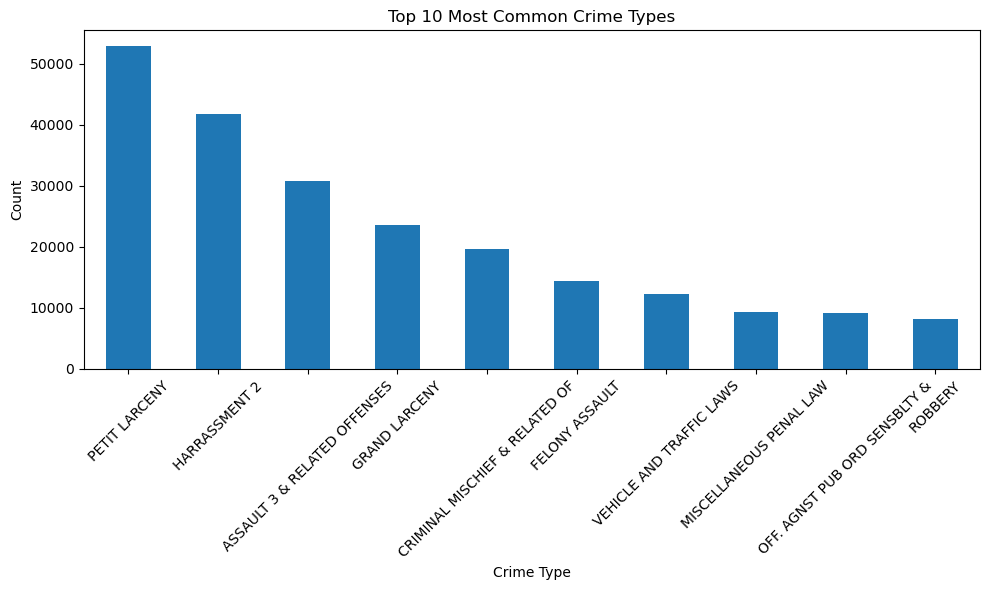

In [150]:
# Crime Type Distribution
plt.figure(figsize=(10,6))
crime_data_cleaned['OFFENSE_DESCRIPTION'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Common Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 2. Crimes by Borough

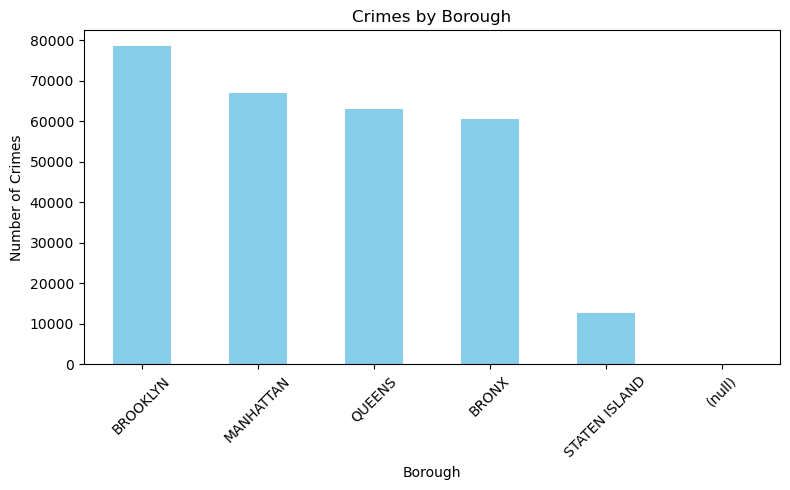

In [151]:
# Crimes by Borough
plt.figure(figsize=(8,5))
crime_data_cleaned['BOROUGH_NAME'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Crimes by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
